In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.pipeline import Pipeline

In [54]:
train=pd.read_csv(r"C:\Users\comp\Downloads\train (3).csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\comp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


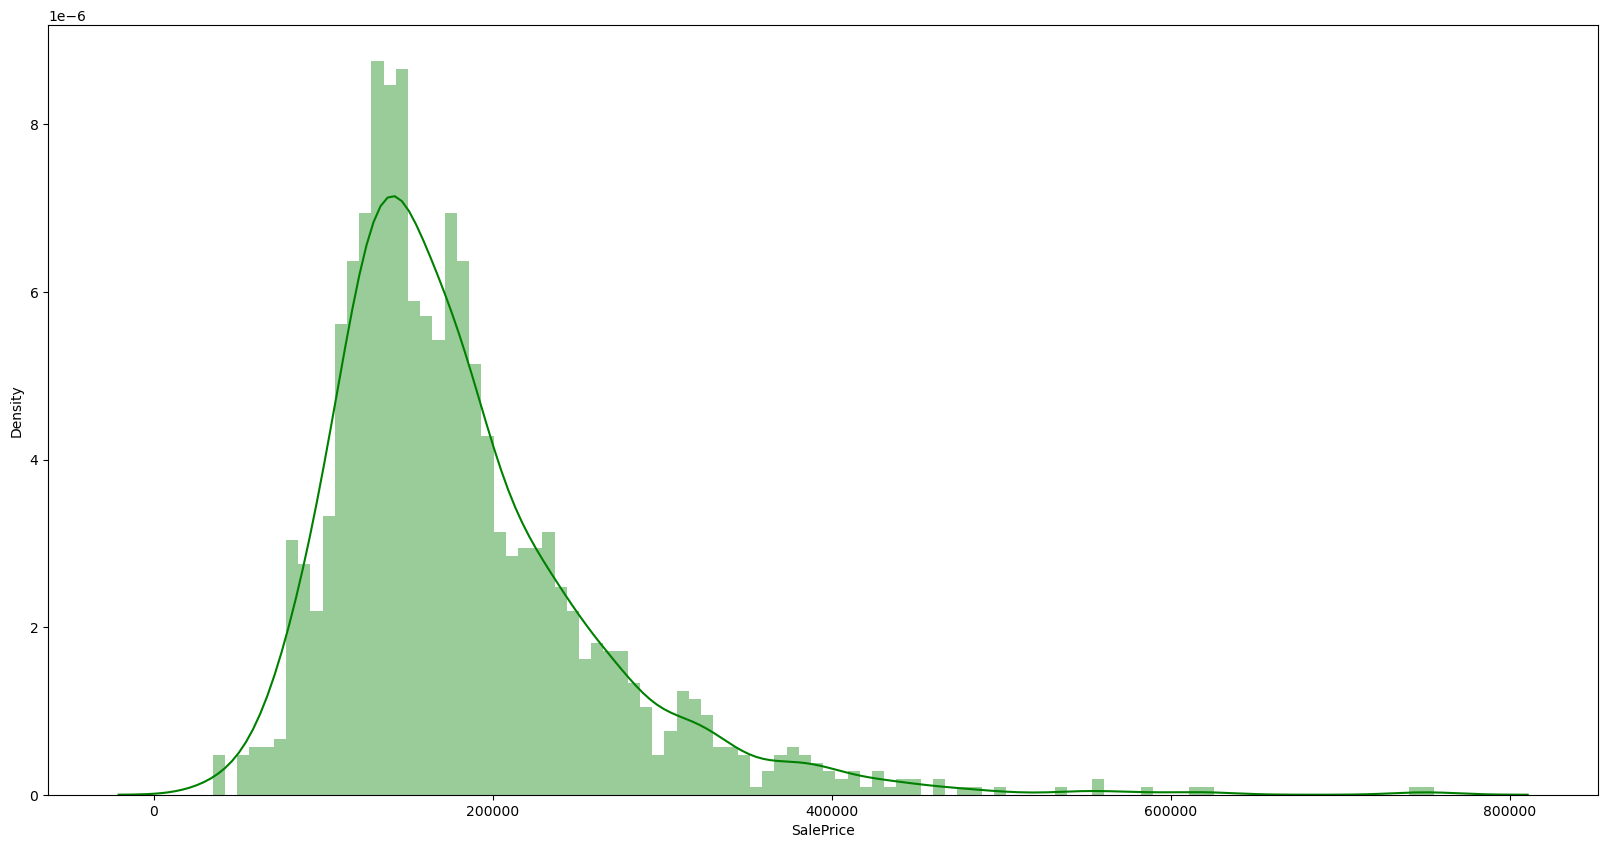

In [56]:
print(train['SalePrice'].describe())
plt.figure(figsize=(20, 10))
sns.distplot(train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

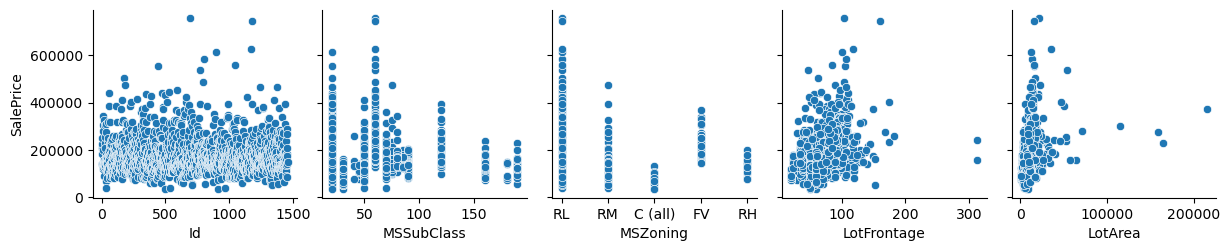

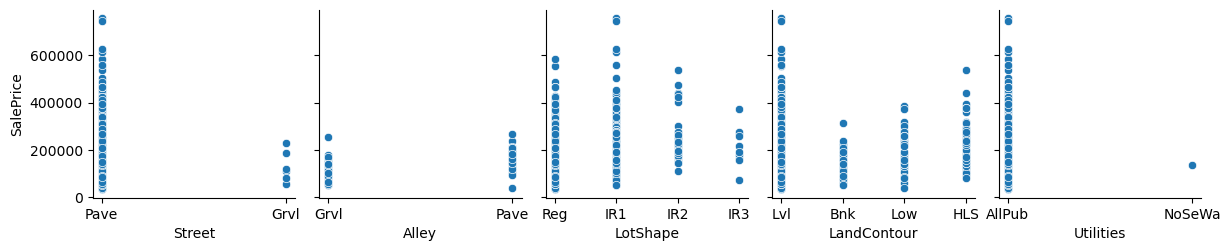

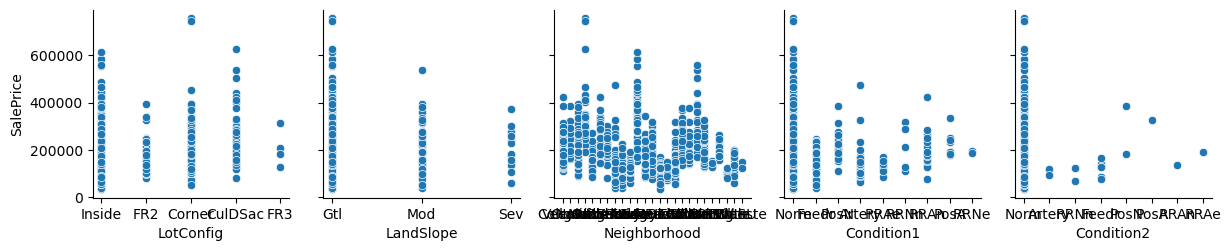

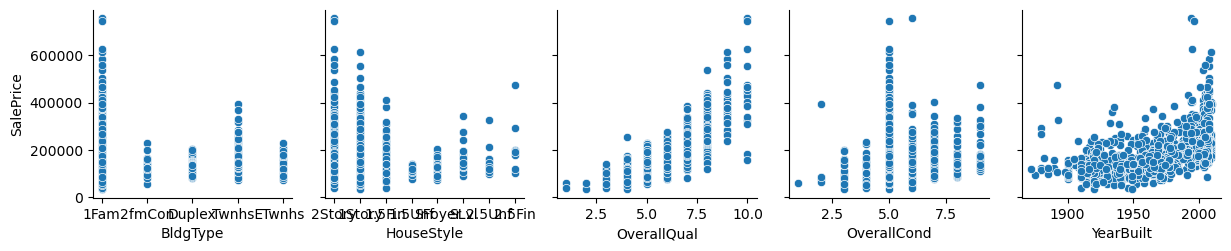

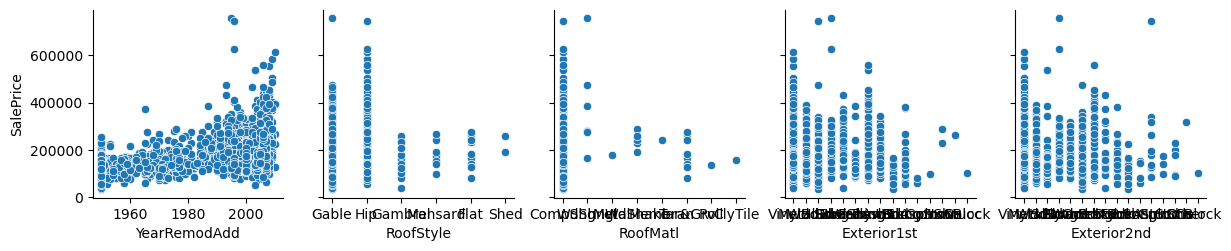

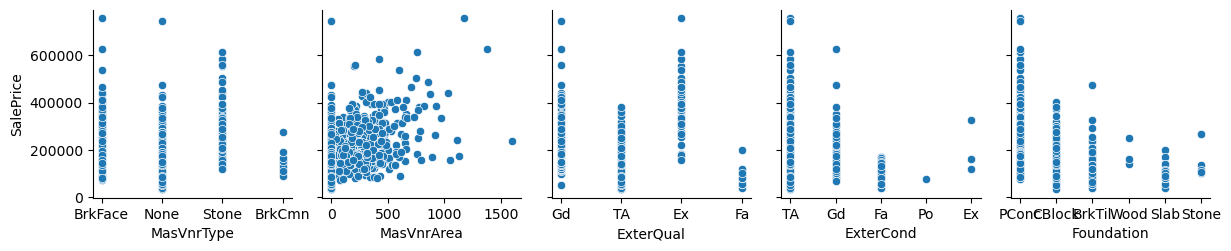

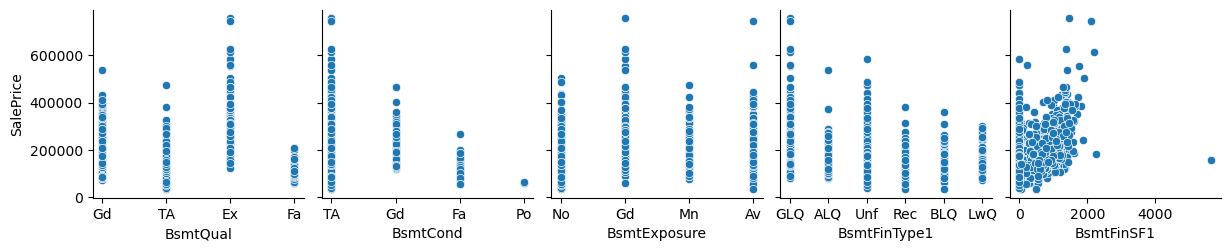

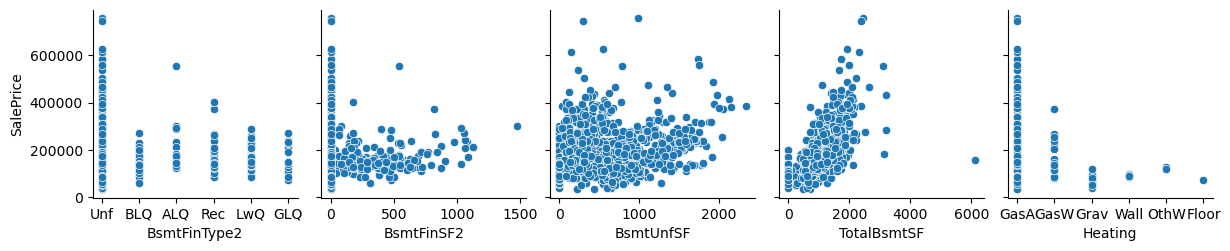

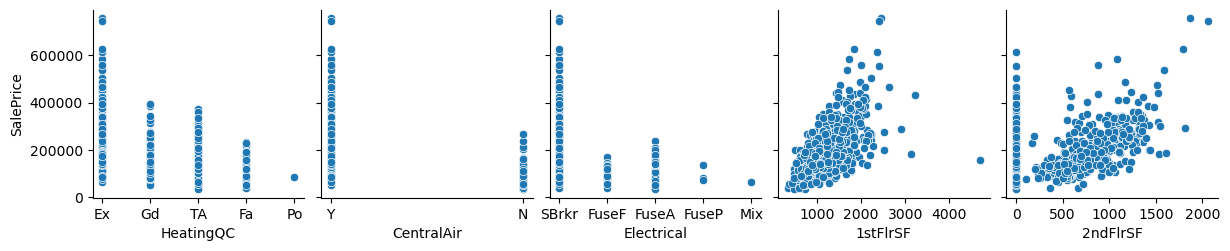

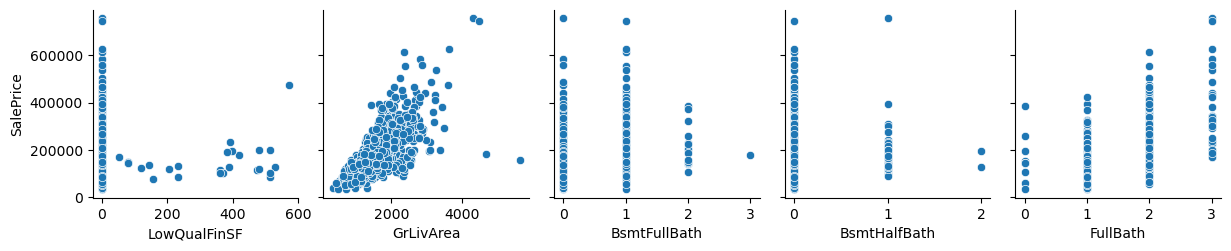

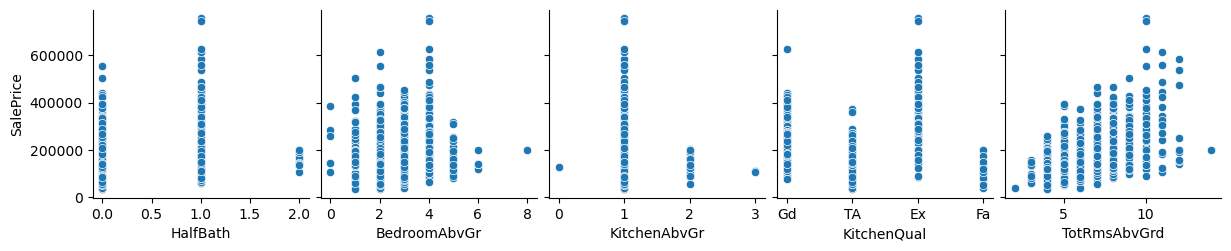

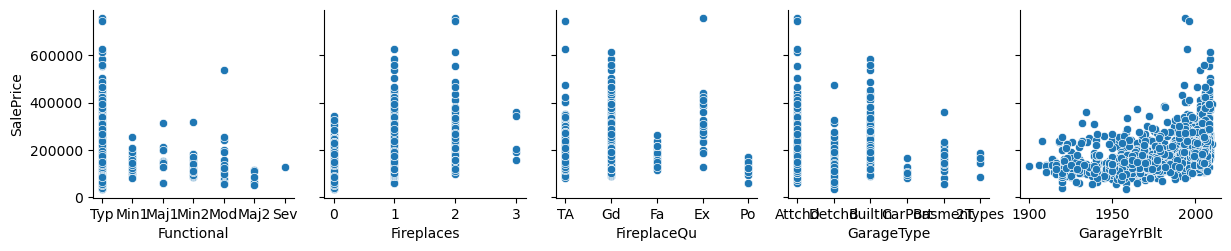

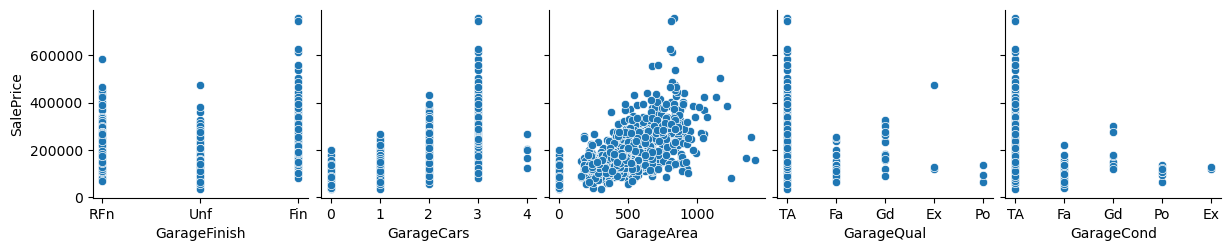

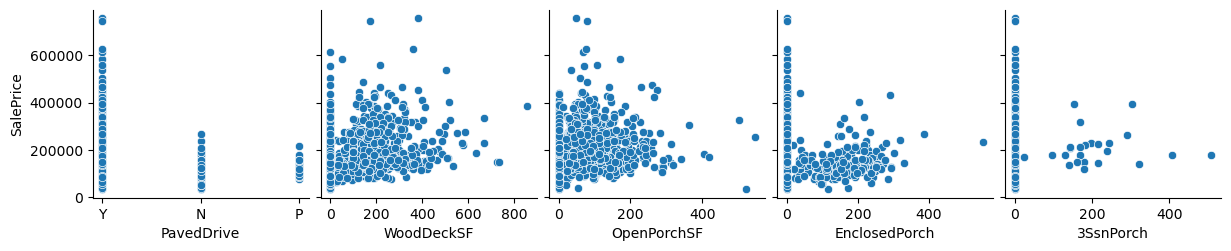

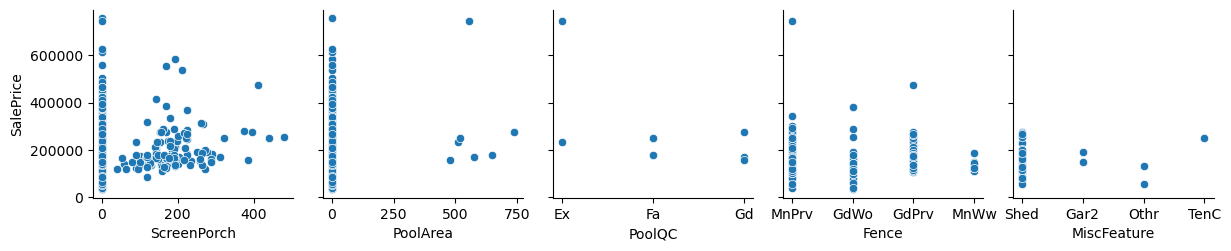

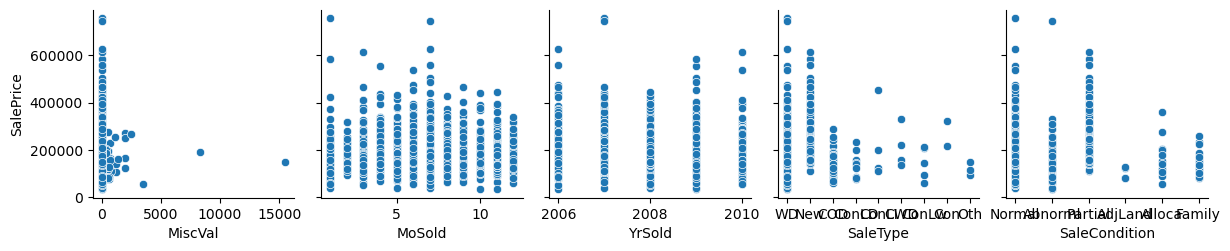

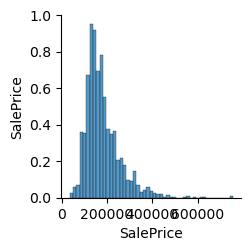

In [57]:
for i in range(0, len(train.columns), 5):
    sns.pairplot(data=train,
                x_vars=train.columns[i:i+5],
                y_vars=['SalePrice'])#,kind="kde")

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [59]:
# for x in train.columns:
#     if train[x].isnull().sum()!=0:
#         if train[x].dtype== 'O':
#             train[x].fillna(train[x].mode(),inplace=True)
#         else:
#             train[x].fillna(train[x].median(),inplace=True)
#         print('missing values in ',x, ': ',train[x].isnull().sum())

In [60]:
# for x in train.columns:
#     if train[x].isnull().sum()!=0:
#         print('missing values in ',x, ': ',train[x].isnull().sum())
# print("Total number of columns of missing values: ", (train.isnull().sum()!=0).sum())

In [68]:
for x in df.columns:
    print(df[x].isnull().sum())
    

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [64]:
# for each column, get value counts in decreasing order and take the index (value) of most common class
df = train.apply(lambda x: x.fillna(x.value_counts().index[0]))
# for x in df:
#     x.isnull()
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,4,2010,WD,Normal,142125


In [40]:
for x in df.columns:
    if df[x].isnull().sum()!=0:
        print('missing values in ',x, ': ',df[x].isnull().sum())
print("Total number of columns of missing values: ", (df.isnull().sum()!=0).sum())

Total number of columns of missing values:  0


In [41]:
from sklearn.preprocessing import LabelEncoder
LL=LabelEncoder()

In [42]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [44]:
for x in df.columns:
    if df[x].dtype== 'O':
        LL=LabelEncoder().fit(df[x])
        df[x]=LL.transform(df[x])


In [45]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,2,2,2,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,2,2,2,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,2,2,2,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,2,2,2,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,2,2,2,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,0,3,3,0,...,0,2,2,2,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,0,3,3,0,...,0,2,2,2,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,0,3,3,0,...,0,2,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,0,3,3,0,...,0,2,2,2,0,4,2010,8,4,142125


In [52]:
df["MiscVal"].value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

In [47]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [49]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit your data on the scaler object
scaled_data = scaler.fit_transform(x)
scaled_data

array([[0.00000000e+00, 2.35294118e-01, 7.50000000e-01, ...,
        5.00000000e-01, 1.00000000e+00, 8.00000000e-01],
       [6.85400960e-04, 0.00000000e+00, 7.50000000e-01, ...,
        2.50000000e-01, 1.00000000e+00, 8.00000000e-01],
       [1.37080192e-03, 2.35294118e-01, 7.50000000e-01, ...,
        5.00000000e-01, 1.00000000e+00, 8.00000000e-01],
       ...,
       [9.98629198e-01, 2.94117647e-01, 7.50000000e-01, ...,
        1.00000000e+00, 1.00000000e+00, 8.00000000e-01],
       [9.99314599e-01, 0.00000000e+00, 7.50000000e-01, ...,
        1.00000000e+00, 1.00000000e+00, 8.00000000e-01],
       [1.00000000e+00, 0.00000000e+00, 7.50000000e-01, ...,
        5.00000000e-01, 1.00000000e+00, 8.00000000e-01]])

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_data,y,random_state=25,test_size=0.2)

In [9]:
# test=pd.read_csv(r"C:\Users\comp\Downloads\test (3).csv")
# test.head()

In [10]:
# x_test=test.drop("Id",axis=1)
# x_test

In [35]:
X_train=train.drop(["SalePrice","Id"],axis=1)
y_train=train["SalePrice"]

In [36]:
# Identify numeric and categorical features
numeric_features = X_train.select_dtypes(include=[np.number]).columns
categorical_features = X_train.select_dtypes(include=[np.object]).columns

C:\Users\comp\AppData\Local\Temp\ipykernel_17576\49051554.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = X_train.select_dtypes(include=[np.object]).columns


In [38]:
# # Create pipelines to preprocess numeric and categorical features
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [25]:
# from scipy.stats import skewnorm
# import numpy as np
# from matplotlib import pyplot as plt
# import seaborn as sbs

# fig, ax = plt.subplots(1, 3, figsize=(10, 5))
# data = skewnorm.rvs(size=1000, a=5)
# sbs.distplot(train, ax=ax[0])
# sbs.distplot(train, ax=ax[1])
# ax[1].set_xscale("log")
# sbs.distplot(np.log(train), ax=ax[2])
# ax[2].set_xticklabels([round(d, 1) for d in np.exp(ax[2].get_xticks())]);

In [ ]:
numeric_transformer

In [ ]:
categorical_transformer

In [ ]:
# Combine the pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

In [ ]:
preprocessor

In [ ]:
# Preprocess the training and test data
X_train_preprocessed = preprocessor.fit_transform(x_tra)
x_test_preprocessed = preprocessor.transform(x_tes)

In [ ]:
LR=LinearRegression()
LR.fit(x_tra,y_tra)

In [ ]:
# y_pred=LR.predict(x_tes)
# y_pred

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_tes, y_pred)*100  

In [ ]:
print(X_train_preprocessed)
print(X_train_preprocessed.shape)

In [ ]:
# from mlxtend.feature_selection import SequentialFeatureSelector
# from sklearn.linear_model import LogisticRegression
# from sklearn.datasets import load_iris
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# import numpy as np

# X, y = load_iris(return_X_y = True)
# X[:10,0] = np.NaN

# clf = Pipeline([
#     ("preprocessing", SimpleImputer(missing_values= np.NaN)),
#     ("model",LogisticRegression(random_state = 1))
# ])

# sfs = SequentialFeatureSelector(estimator = clf, 
#                                 forward = True, 
#                                 k_features = 'best', 
#                                 scoring = "accuracy", 
#                                 cv = 3, n_jobs=-1).fit(X, y)
# sfs.k_feature_idx_

# (0, 1, 2, 3)

In [ ]:
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# clf = LinearRegression()

# # Build step forward feature selection
# sfs1 = sfs(clf,k_features = 10,forward=True,floating=False, scoring='r2',cv=5)

# # Perform SFFS
# sfs1 = sfs1.fit(x_tra, y_tra)

In [ ]:
# y_pre=sfs1.predict(x_tes)
# y_pre

In [ ]:
# sfs = SequentialFeatureSelector(estimator = clf, 
#                                 forward = True, 
#                                 k_features = 'best', 
#                                 scoring = "accuracy", 
#                                 cv = 3, n_jobs=-1).fit(X, y)

In [ ]:
# sfs = SequentialFeatureSelector(estimator = clf, 
#                                 forward = True, 
#                                 k_features = 'best', 
#                                 scoring = "accuracy", 
#                                 cv = 3, n_jobs=-1).fit(x_tra, y_tra)

In [ ]:
y_pred1=LR.predict(x_test_preprocessed)
y_pred1    

In [ ]:
# data1=pd.DataFrame(y_pred1)
# data1

In [ ]:
# a=test["Id"]
# A=pd.DataFrame(a)

In [ ]:
# Prediction=pd.concat([A,data1],axis="columns")
# Prediction

NameError: name 'stats' is not defined

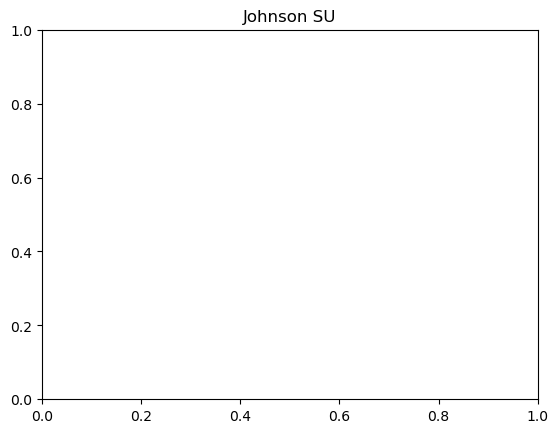

In [26]:
y = train['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
# train.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
# from sklearn.linear_model import Lasso

In [ ]:
# # Train the final model on the full training set with the best alpha value
# lasso = Lasso(alpha=best_alpha, max_iter=1000000)
# lasso.fit(X_train, y_train)


In [ ]:
# import os
# dataset.to_csv(r'House_Data1.csv')


# from IPython.display import FileLink
# FileLink(r'House_Data1.csv')

In [ ]:
# submission = pd.concat([test_ids, pd.Series(final, name='SalePrice')], axis=1)
# submission

In [ ]:
data_test=pd.read_csv(r"C:\Users\comp\Downloads\test (3).csv")
data_test.head()

In [ ]:
# for col in data_test.columns:
#     if data_test[col].dtype == object:
#         data_test[col] = data_test[col].astype(str)
#         data_test[col]=lbl.fit_transform(data_test[col])
# # print(data_test)

In [ ]:
for col in data_test.columns:
    if data_test[col].dtype == object:
        data_test[col] = data_test[col].astype(str)
        data_test[col]=lbl.fit_transform(data_test[col])
print(data_test)